In [1]:
# include("PyrochloreGeometry.jl")
# import .PyrochloreGeometry as geom
include("SpinonStructure.jl")
include("BZMath.jl")
using BenchmarkTools
using Plots


In [2]:
A_dict = Dict(
    "0flux_big"=>load_A("gaugefiles/0_flux_big.gauge"),
    "0flux" => load_A("gaugefiles/0_flux_manual.gauge"),
    "πflux" => [ 0 0 π π ; 0 0 0 0; 0 0 π π; 0 0 0 0 ],
    "ππ00" =>  [ 0 0 0 π ; 0 0 0 0; 0 0 0 π; 0 0 0 0 ],
    "FF_even"=>load_A("gaugefiles/FF_even.gauge")
    )

high_symmetry_points = Dict(
    "\\Gamma"=> [0.,0.,0.],
    "X"=> [1.,0.,0.],
    "W"=> [1.,0.5,0.],
    "K"=> [0.75,0.75,0.],
    "L"=> [0.5,0.5,0.5],
    "U"=> [1.0, 0.25,0.25]
) 

Dict{String, Vector{Float64}} with 6 entries:
  "U"       => [1.0, 0.25, 0.25]
  "W"       => [1.0, 0.5, 0.0]
  "X"       => [1.0, 0.0, 0.0]
  "\\Gamma" => [0.0, 0.0, 0.0]
  "L"       => [0.5, 0.5, 0.5]
  "K"       => [0.75, 0.75, 0.0]

In [3]:
lat = geom.PyroFCC(2)
calc_fluxes(lat, A_dict["FF_even"])

32×4 Matrix{Float64}:
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.17809  1.1781   1.17809
 2.7489   1.1781   1.1781   1.17809
 2.7489   1.17809  1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781
 2.7489   1.17809  1.1781   1.1781
 2.7489   1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.17809  1.1781   1.1781
 2.7489   1.1781   1.1781   1.17809
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.17809  1.1781
 2.7489   1.1781   1.17809  1.1781
 ⋮                          
 2.7489   1.1781   1.17809  1.1781
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.17809
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781
 2.7489   1.17809  1.1781   1.1781
 2.7489   1.1781   1.1781   1.17809
 2.74889  1.1781   1.1781   1.17809
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781
 2.74889  1.1781   1.1781   1.1781

## Calculating the spectral weight

We now calculate
$$\begin{align}
\langle S^+(\mathbf{q}, t)S^-(\mathbf{-q},0)\rangle = 
&\frac{1}{4f^{2}N_{\rm spin }}\sum_{\begin{smallmatrix}\mathbf{k}&r_{A}&\mu\\ \mathbf{k}'&r_A'&\nu\end{smallmatrix}}
e^{iA_{r_A,r_A+b_\mu}-iA_{r_A',r_A'+b_\nu}}~e^{i \mathbf{k}\cdot \mathbf{b}_{\mu}-i \mathbf{k}'\cdot \mathbf{b}_{\nu}}
\times\left\langle 
\phi_{\mathbf{r}_{A}} ^{*}(\mathbf{k}+ \frac{\mathbf{q}}{2},t)\,
\phi_{\mathbf{r}_A+\mathbf{b}_\mu}(\mathbf{k}-\frac{\mathbf{q}}{2},t)~
\phi_{\mathbf{r}'_{A}+\mathbf{b}_\nu} ^{*}(\mathbf{k}'+ \frac{\mathbf{q}}{2},0)\,
\phi_{\mathbf{r}'_A}(\mathbf{k}'-\frac{\mathbf{q}}{2},0)
 \right\rangle
 \end{align}
$$
setting $K = \frac{1}{2}(k+k')$, $p=k-k'$, get
$$= \sum_{\mu,\nu} 
\left(\sum_{\mathbf{K}}\frac{1}{4f^2N_{\rm spin}} e^{i \mathbf{K}\cdot (b_\mu - b_\nu)}\right)
e^{iA_{r_A,r_A+b_\mu}-iA_{r_A',r_A'+b_\nu}}
\sum_{\mathbf{p},r_A,r'_A} 
 e^{i \mathbf{p}\cdot (b_\mu + b_\nu)/2}
\mathcal{G}_{r_A,r'_A}(\mathbf{p}+\mathbf{q}, t)\mathcal{G}_{r'_A+b_\nu,r_A+b_\mu}(-\mathbf{p}+\mathbf{q}, -t)
$$


The zero-temperature Green function, in terms of spinon energies $\mathcal{E}_l(\mathbf{k}) = \sqrt{2J_{zz}(\lambda+\epsilon_{l}(\mathbf{k}))}$
is
$$
\begin{align}
\mathcal{G}_{ab}(\mathbf{k},\omega) = \sum_{l=1}^{f}\frac{2J_{zz}U_{al} (\mathbf{k})U^{\dagger}_{lb}(\mathbf{k})}{-\omega^{2}+\mathcal{E}_l(\mathbf{k})^2}\\
= \sum_{l=1}^{f}{2J_{zz}U_{al} (\mathbf{k})U^{\dagger}_{lb}(\mathbf{k})}
\frac{1}{2\mathcal{E}_l(\mathbf{k})}
\left[ \frac{-1}{\omega-\mathcal{E}_l(\mathbf{k})} + \frac{1}{\omega+\mathcal{E}_l(\mathbf{k})} \right]
\end{align}
$$

Thus rendering the spin-spin response
$$
\begin{align*}
\mathcal{S}_{r_A\,\mu\;r_A'\,\nu}(\mathbf{q},\omega)=&
\sum_{\mathbf{\Delta}}\sum_{\begin{smallmatrix}r_{A}&\mu\\ r_A'&\nu\end{smallmatrix}}F_{\mu\nu}(\mathbf{\Delta})~
e^{iA_{r_A,r_A+b_\mu}-iA_{r_A',r_A'+b_\nu}}\,\times\\
&\int \frac{d\omega_{1}}{2\pi}\,
\mathcal{G}_{r_{A}\,r_{A}'}(\mathbf{\Delta}+\mathbf{q}, \omega_1)~
\mathcal{G}_{r_A+\mu\,r_A'+\nu}\,(-\mathbf{\Delta}+\mathbf{q},\omega_1-\omega)
\end{align*}
$$


In [4]:
using JLD
using HDF5
using IJulia
using ProgressMeter


@kwdef struct IntegrationParameters
    n_K_samples::Int
    BZ_grid_density::Int
end

function save_SQW(;S::Matrix{ComplexF64}, bounds::Matrix{Float64}, Egrid::Vector{Float64}, BZ_path::BZPath,
        sim::SimulationParameters, 
        ip::IntegrationParameters)
    name = "output/SQW?name=$(sim.name)?Jpm=$(sim.Jpm)?B=$(sim.B).jld"
    jldopen(name, "w") do file
        g1 = create_group(file, "integration_parameters")
        g1["n_K_samples"] = ip.n_K_samples
        g1["BZ_grid_density"] = ip.BZ_grid_density

        g = create_group(file, "physical_parameters")
        g["name"] = sim.name
        g["fluxes"] = sim.A
        g["Jpm"] = sim.Jpm
        g["B"] = sim.B
        g["lambda"] = sim.λ
        g["L"]=sim.lat.L

        d = create_group(file, "intensity") 
        d["S"] = S
        d["bounds"] = bounds
        # a list of K points, such that the I'th S slics corresponds to the I'th K point
        d["Q_list"] = path.K 
        d["tau"] = path.t
        d["ticks_tau"] = path.ticks_t
        d["ticks_label"] = path.ticks_label
        d["W"] = Egrid
    end
    return name
end
    


save_SQW (generic function with 1 method)

In [5]:
path = generate_path(high_symmetry_points, split("\\Gamma X W K \\Gamma L U W"), points_per_unit=10, K_units=2π/8)

function run_sim(sim::SimulationParameters, ip::IntegrationParameters, Egrid::Vector{Float64})
    
    num_K = length(path.K)
    
    S = zeros(ComplexF64, num_K, length(Egrid))
    bounds = zeros(Float64, num_K, 2)
    

    p = Progress(num_K)

    @time begin
        Threads.@threads for I = 1:num_K
            q = path.K[I]
            S[I, :], bounds[I,:] = spectral_weight(q, Egrid, sim, ip.n_K_samples, ip.BZ_grid_density)
            next!(p)
        end
    end
    finish!(p)

    # save the data
    save_SQW(S=S, bounds=bounds, BZ_path=path, Egrid=collect(Egrid), sim=sim, ip=ip)
end

run_sim (generic function with 1 method)

In [ ]:
sim = SimulationParameters("πflux", A=A_dict["πflux"], Jpm=0.3, B=[0.,0.,0.], nsample=1000, kappa=1.0)
ip_fast = IntegrationParameters(n_K_samples=100,BZ_grid_density=50)
Egrid = collect(range(0,4,100))

res = run_sim(sim, ip_fast, Egrid)

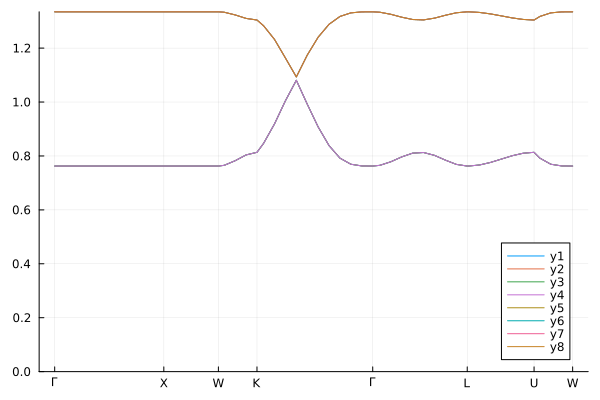

In [6]:
data = load("output/SQW?name=πflux?Jpm=0.3?B=[0.0, 0.0, 0.0].jld")
d = data["intensity"]

sim = SimulationParameters(data["physical_parameters"])


E = reduce(vcat, map(k-> spinon_dispersion(k, sim)[1], d["Q_list"] )')

plot(d["tau"],E)
xticks!(path.ticks_t, path.ticks_label)
ylims!(0.,maximum(E))

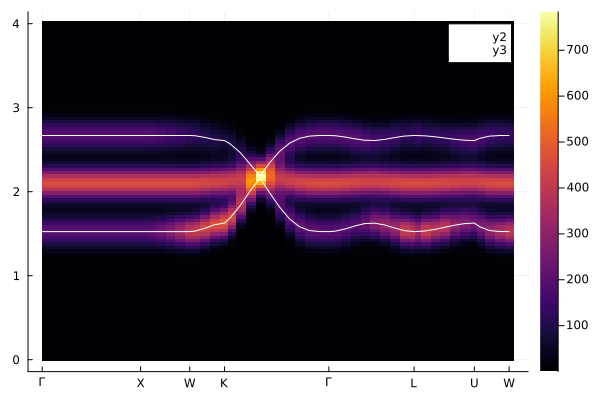

In [7]:



heatmap(d["tau"],d["W"],real.(d["S"])')
plot!(d["tau"], d["bounds"], linecolor=:white)
xticks!(d["ticks_tau"],d["ticks_label"])

In [ ]:
? xlabel!


In [ ]:
SimulationParameters(data["physical_parameters"])
